### Testing out basics

In [1]:
import tensorflow as tf

In [2]:
interactive_session = tf.InteractiveSession()

In [3]:
a = tf.zeros((2,2))
b = tf.ones((2,2))

In [4]:
tf.reduce_sum(b, reduction_indices=1)

<tf.Tensor 'Sum:0' shape=(2,) dtype=float32>

In [5]:
tf.reduce_sum(b, reduction_indices=1).eval()

array([ 2.,  2.], dtype=float32)

In [6]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [7]:
a.eval()

array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [8]:
tf.reshape(a, (1,4)).eval()

array([[ 0.,  0.,  0.,  0.]], dtype=float32)

In [9]:
tf.reshape(a, (4,1)).eval()

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [10]:
tf.matmul(a,b).eval()

array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [11]:
b

<tf.Tensor 'ones:0' shape=(2, 2) dtype=float32>

In [12]:
print(b)

Tensor("ones:0", shape=(2, 2), dtype=float32)


In [13]:
weights = tf.Variable(tf.zeros((2,2)), name="weights")

In [14]:
#weights.eval() - throws exception due to uninitialization

In [15]:
tf.initialize_all_variables()

In [16]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    weights.eval()
    print sess.run(weights)

[[ 0.  0.]
 [ 0.  0.]]


In [17]:
d = tf.Variable(0, name="Counter")
add_one = tf.add(d,1)
update_d = tf.assign(d, add_one)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for i in range(3):
        sess.run(update_d)
        print(sess.run(d))

1
2
3


In [18]:
add_one

<tf.Tensor 'Add:0' shape=() dtype=int32>

### Linear Regression

In [19]:
import numpy as np
%matplotlib inline

In [20]:
from matplotlib import pyplot as plt

In [21]:
import seaborn

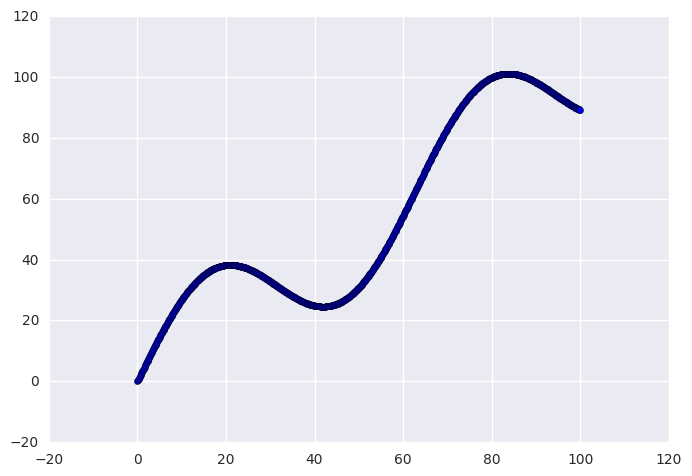

In [22]:
x = np.arange(0,100,0.1)
y = x + 20 * np.sin(x/10)
plt.scatter(x, y)

In [23]:
n_samples = 1000
batch_size = 100

In [24]:
x_data = np.reshape(x, (n_samples,1))
y_data = np.reshape(y, (n_samples, 1))

In [25]:
x_input = tf.placeholder(tf.float32, shape=(batch_size, 1))
y_input = tf.placeholder(tf.float32, shape=(batch_size, 1))

In [26]:
with tf.variable_scope("linear_regression"):
    W = tf.get_variable("weights", (1,1), initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(x_input,W) + b
    loss = tf.reduce_sum((y - y_pred)**2)/n_samples

In [27]:
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)

In [28]:
if 'session' in locals() and interactive_session is not None:
    print('Close interactive session')
    interactive_session.close()

In [29]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for _ in range(500):
        # select random mini-batch
        indices = np.random.choice(n_samples, batch_size)
        x_batch = x_data[indices]
        y_batch = y_data[indices]
        _, loss_val = sess.run([opt_operation, loss], feed_dict={x_input: x_batch, y_input: y_batch})
        print(loss_val)

2.25614e+06
2.43183e+06
2.31179e+06
2.16133e+06
2.54426e+06
2.35845e+06
2.39975e+06
2.1677e+06
2.25646e+06
2.42176e+06
2.37617e+06
2.43084e+06
2.60132e+06
2.44399e+06
2.36708e+06
2.22893e+06
2.1983e+06
2.29019e+06
2.32304e+06
2.34377e+06
2.4913e+06
2.31421e+06
2.31149e+06
2.26452e+06
2.54935e+06
2.23671e+06
2.35057e+06
2.43478e+06
2.205e+06
2.22286e+06
2.1635e+06
2.28358e+06
2.47716e+06
1.98313e+06
2.46643e+06
2.18862e+06
2.15147e+06
2.40125e+06
2.63574e+06
2.39022e+06
2.23217e+06
2.29198e+06
2.16732e+06
2.50349e+06
2.10509e+06
2.38082e+06
2.35742e+06
2.19042e+06
2.09911e+06
2.17594e+06
2.37786e+06
2.24528e+06
2.25904e+06
1.99264e+06
2.31908e+06
2.25577e+06
2.14531e+06
2.12874e+06
2.42401e+06
2.32386e+06
2.37008e+06
2.23923e+06
2.25091e+06
2.41755e+06
2.11321e+06
2.13969e+06
2.28334e+06
2.43771e+06
2.40326e+06
2.09848e+06
2.18583e+06
2.16114e+06
2.37793e+06
2.22876e+06
2.18223e+06
2.25421e+06
2.30217e+06
2.36085e+06
2.50623e+06
2.21176e+06
2.14829e+06
2.43469e+06
1.98888e+06
2.40416e+0